In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob

from __future__ import unicode_literals
from IPython.core.display import display, HTML

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 50)

%matplotlib inline

In [2]:
# Global configurations
# ---------------------

# Expand the notebook to the width of the browser
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib style
plt.style.use('seaborn-colorblind')

# Use LaTeX and its body font for the diagrams' text.
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Nimbus Roman Becker No9L']

# Font sizes
SIZE = 24
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-2)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

# Use thinner lines for axes to avoid distractions.
mpl.rcParams['axes.linewidth']    = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.linewidth'] = 2


# Do not use a box for the legend to avoid distractions.
mpl.rcParams['legend.frameon'] = False

# Restore part of matplotlib 1.5 behavior
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['errorbar.capsize'] = 3

# Helpers
# -------

# Use coordinated colors. These are the "Tableau 20" colors as 
# RGB. Each pair is strong/light. For a theory of color    
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21] 
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
  
# Scale the RGB values to the [0, 1] range, which is the format 
# matplotlib accepts.    
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Return a single plot without right and top axes
def fig_setup():
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    
    return fig, ax

In [3]:
#Macrostate data

def get_macrostate_data(path, dur, en, iters):

    #macro_ue_df = pd.DataFrame(columns=range(1,5), index=range(1, iters+1))
    macro_ev_df = pd.DataFrame(columns=range(1,5))
    macros = glob.glob('%s/macrostate*.txt'%(path))

    for f in macros:

        try:
            it = int(f.split('/')[4].strip().split('-')[1].strip().split('.')[0])
        except:
            it=int(f.split('-')[1].strip().split('.')[0].strip())

        data = open(f, 'r').readlines()

        blank=0
        vals=[]
        data_has_uncertainty = False
        for line in data:

            if line == '\n':
                blank+=1
                continue

            if 'Eigen uncertainty' in line :
                data_has_uncertainty = True
                
            if not data_has_uncertainty:
                if blank==7:
                    vals.append(float(line.strip()))
            else:
                if blank==9:
                    vals.append(float(line.strip()))

        macro_ev_df.loc[it*dur*en] = vals + [0]*(4 - len(vals))

    macro_ev_df.sort_index(inplace=True)
    
    return macro_ev_df

In [4]:
#Microstate data

def get_microstate_data(path, dur, en, iters):
    #micro_ue_df = pd.DataFrame(columns=range(1,11), index=range(1, iters+1))
    micro_ev_df = pd.DataFrame(columns=range(1,22))
    micros = glob.glob('%s/microstate*.txt'%(path))

    for f in micros:    

        try:
            it = int(f.split('/')[4].strip().split('-')[1].strip().split('.')[0])
        except:
            it=int(f.split('-')[1].strip().split('.')[0].strip())

        data = open(f, 'r').readlines()

        blank=0
        vals=[]
        data_has_uncertainty = False
        for line in data:

            if line == '\n':
                blank+=1
                continue

            if 'Eigen uncertainty' in line :
                data_has_uncertainty = True
                
            if not data_has_uncertainty:
                if blank==7:
                    vals.append(float(line.strip()))
            else:
                if blank==9:
                    vals.append(float(line.strip()))
                

        micro_ev_df.loc[it*dur*en] = vals + [0]*(21 - len(vals))

    micro_ev_df.sort_index(inplace=True)
    
    return micro_ev_df


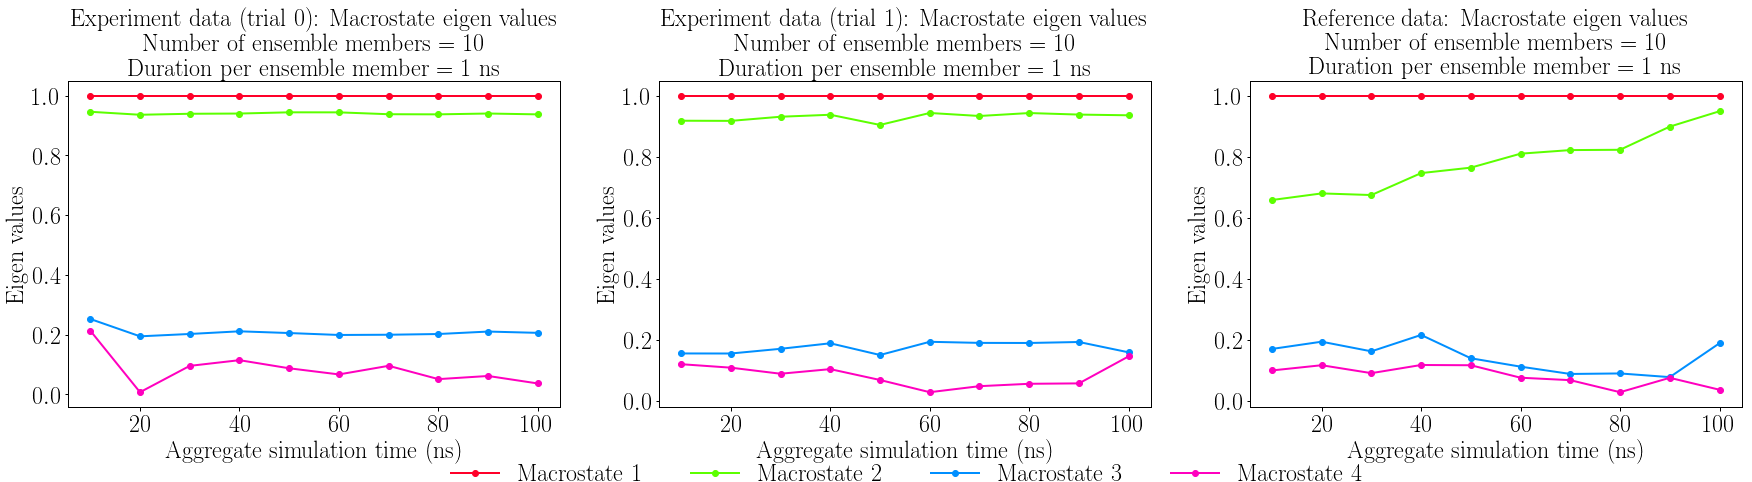

In [5]:
trials = 2
fig, ax = plt.subplots(1, trials+1)
fig.set_size_inches((30, 6))
SIZE = 24
dur=1
en=10
iters=10

for i in range(trials):
    path = '../raw_data/exp_data/dur-%s-ensemble-%s-iters-%s-trial-%s'%(dur,en,iters,i+1)
    macro_ev_df_iters_10 = get_macrostate_data(path, dur, en, iters)
    ax1 = macro_ev_df_iters_10.plot(ax=ax[i],kind='line',marker='o',colormap='gist_rainbow', legend=False, fontsize=SIZE)
    ax1.set_xlabel('Aggregate simulation time (ns)', fontsize=SIZE)
    ax1.set_ylabel('Eigen values', fontsize=SIZE)
    ax1.set_title('Experiment data (trial %s): Macrostate eigen values \n Number of ensemble members = %s \n Duration per ensemble member = %s ns'%(i, en, dur), fontsize=SIZE)

path = '../raw_data/ref_data'
macro_ev_df_ref = get_macrostate_data(path, dur, en, iters)
ax1 = macro_ev_df_ref.plot(ax=ax[trials],kind='line',marker='o',colormap='gist_rainbow', legend=False, fontsize=SIZE)
ax1.set_xlabel('Aggregate simulation time (ns)', fontsize=SIZE)
ax1.set_ylabel('Eigen values', fontsize=SIZE)
ax1.set_title('Reference data: Macrostate eigen values \n Number of ensemble members = %s \n Duration per ensemble member = %s ns'%(en, dur), fontsize=SIZE)

handles, labels = ax1.get_legend_handles_labels()

new_labels = list()
for i in range(len(labels)):
    new_labels.append('Macrostate ' + labels[i])
    
fig.legend(handles, new_labels, loc = 'upper center', bbox_to_anchor = [0.42, 0.09], ncol=4, fontsize=SIZE)

fig.savefig('../plots/msm_validation_macrostates.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/msm_validation_macrostates.png', dpi=100, bbox_inches='tight')

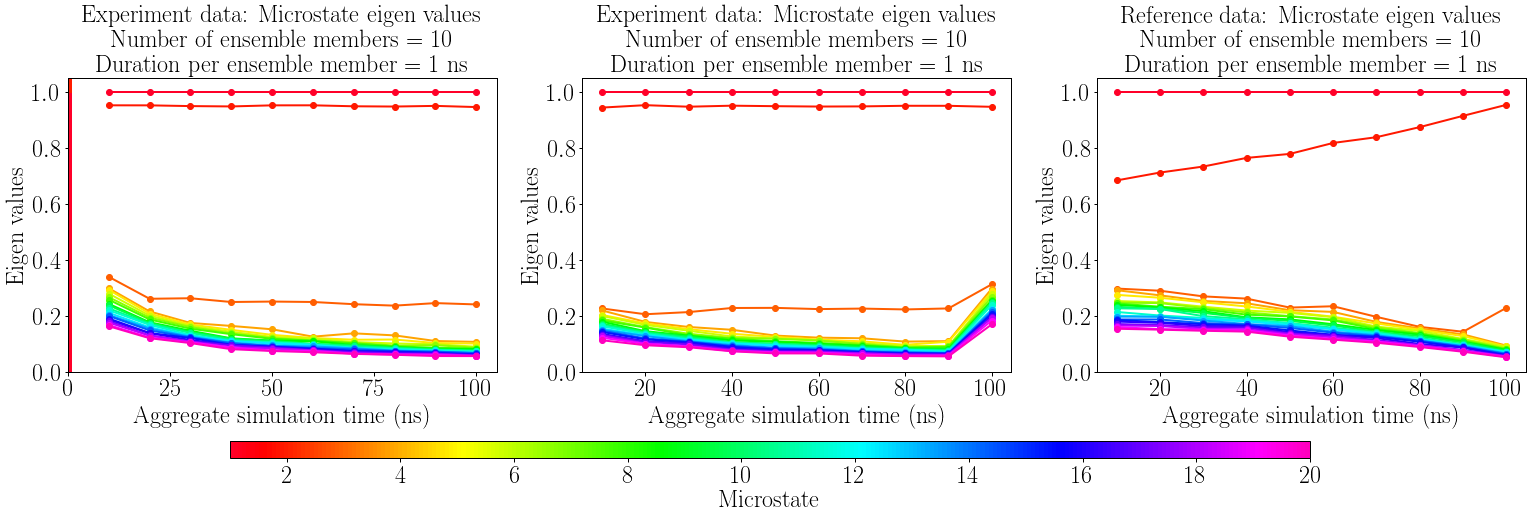

In [6]:
trials = 2
fig, ax = plt.subplots(1, trials+1)
fig.set_size_inches((30, 6))

dur=1
en=10
iters=10

for i in range(trials):
    path = '../raw_data/exp_data/dur-%s-ensemble-%s-iters-%s-trial-%s'%(dur,en,iters, i+1)
    micro_ev_df_iters_10 = get_microstate_data(path, dur, en, iters)
    ax2 = micro_ev_df_iters_10.plot(ax=ax[i],kind='line',marker='o',colormap='gist_rainbow', legend=False, fontsize=SIZE)
    ax2.set_xlabel('Aggregate simulation time (ns)', fontsize=SIZE)
    ax2.set_ylabel('Eigen values', fontsize=SIZE)
    ax2.set_title('Experiment data: Microstate eigen values \n Number of ensemble members = %s \n Duration per ensemble member = %s ns'%(en, dur), fontsize=SIZE)
    ax2.legend().set_visible(False)
    ax2.set_ylim(0,1.05)
#     display(micro_ev_df_iters_10)


path = '../raw_data/ref_data'
micro_ev_df_ref = get_microstate_data(path, dur, en, iters)
ax2 = micro_ev_df_ref.plot(ax=ax[trials],kind='line',marker='o',colormap='gist_rainbow', legend=False, fontsize=SIZE)
ax2.set_xlabel('Aggregate simulation time (ns)', fontsize=SIZE)
ax2.set_ylabel('Eigen values', fontsize=SIZE)
ax2.set_title('Reference data: Microstate eigen values \n Number of ensemble members = %s \n Duration per ensemble member = %s ns'%(en, dur), fontsize=SIZE)
ax2.set_ylim(0,1.05)

#print dir(ax[0])
heatmap = ax[0].pcolor([[x+1] for x in range(20)], cmap='gist_rainbow')

#legend
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.2, 0.0, 0.5, 0.04])
cbar = plt.colorbar(heatmap, cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel('Microstate', rotation=0, fontsize=SIZE)
cbar.set_ticks([x for x in range(2,21,2)])
# cbar.ax.get_xaxis().labelpad = 15
plt.subplots_adjust(bottom = 0.2)
fig.savefig('../plots/msm_validation_microstates.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/msm_validation_microstates.png', dpi=100, bbox_inches='tight')

In [7]:
trials = 3

dur=1
en=10
iters=10

cols = ['Trial %s'%(i+1) for i in range(trials)] + ['Reference']
macro_mean_df = pd.DataFrame(columns=cols, index = [1,2,3,4])
micro_mean_df = pd.DataFrame(columns=cols, index = [x for x in range(1,21)])
macro_std_df = pd.DataFrame(columns=cols, index = [1,2,3,4])
micro_std_df = pd.DataFrame(columns=cols, index = [x for x in range(1,21)])
for i in range(trials):
    path = '../raw_data/exp_data/dur-%s-ensemble-%s-iters-%s-trial-%s'%(dur,en,iters,i+1)
    macro_df_exp = get_macrostate_data(path, dur, en, iters)
    macro_mean_df['Trial %s'%(i+1)] = macro_df_exp.mean(axis=0)
    macro_std_df['Trial %s'%(i+1)] = macro_df_exp.std(axis=0)
    micro_df_exp = get_microstate_data(path, dur, en, iters)
    micro_mean_df['Trial %s'%(i+1)] = micro_df_exp.mean(axis=0)
    micro_std_df['Trial %s'%(i+1)] = micro_df_exp.std(axis=0)
    
    
# macro_mean_df.loc[i] = [macro_df_exp.mean(axis=0).tolist()[i-1], macro_df_ref.mean(axis=0).tolist()[i-1]]
# macro_std_df.loc[i] = [macro_df_exp.std(axis=0).tolist()[i-1], macro_df_ref.std(axis=0).tolist()[i-1]]

path = '../raw_data/ref_data'
macro_df_ref = get_macrostate_data(path, dur, en, iters)
micro_df_ref = get_microstate_data(path, dur, en, iters)
macro_mean_df['Reference'] = macro_df_ref.mean(axis=0)
micro_mean_df['Reference'] = micro_df_ref.mean(axis=0)
macro_std_df['Reference'] = macro_df_ref.std(axis=0)
micro_std_df['Reference'] = micro_df_ref.std(axis=0)


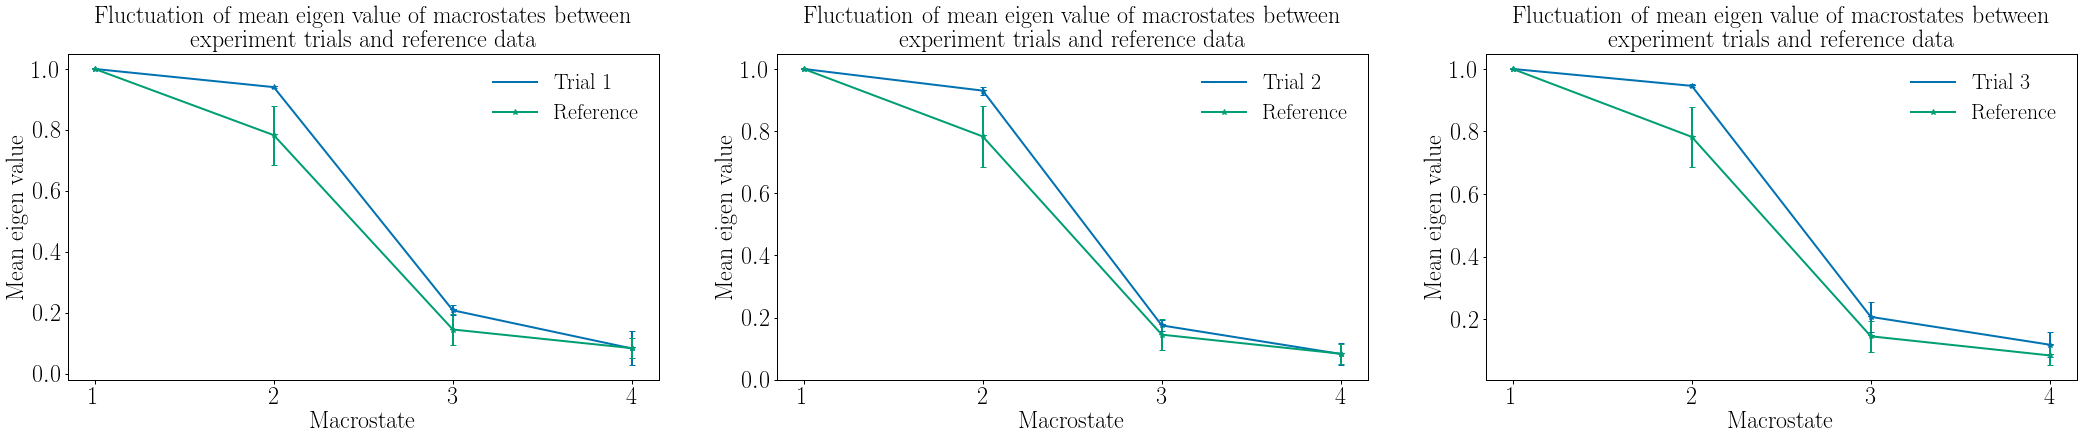

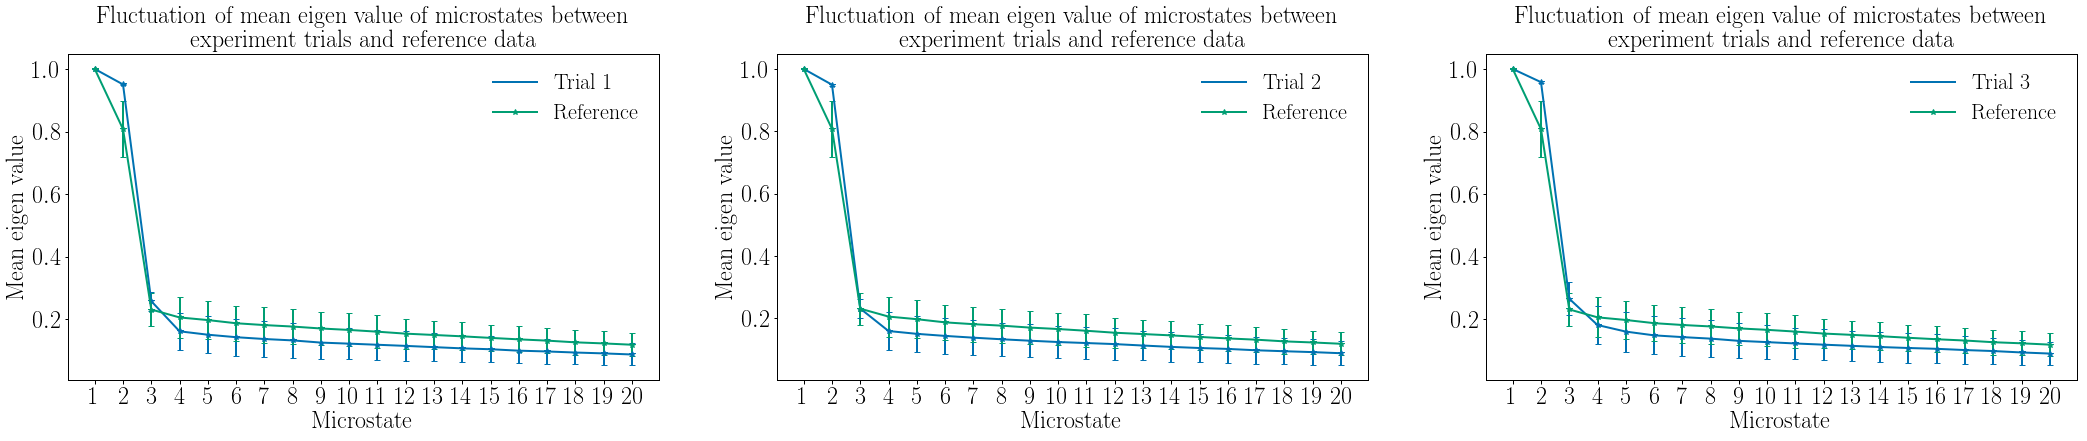

In [8]:
fig, ax = plt.subplots(1, trials)
fig.set_size_inches((trials*12, 6))

for i in range(trials):
    
    macro_ax = macro_mean_df['Trial %s'%(i+1)].plot(ax=ax[i],yerr= macro_std_df['Trial %s'%(i+1)], kind='line', marker='*', fontsize=SIZE, legend=True)
    ref_ax = macro_mean_df['Reference'].plot(ax=ax[i],yerr= macro_std_df['Reference'], kind='line', marker='*', fontsize=SIZE, legend=True)
    macro_ax.set_title('Fluctuation of mean eigen value of macrostates between \n experiment trials and reference data', fontsize=SIZE)
    macro_ax.set_xlabel('Macrostate', fontsize=SIZE)
    macro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
    macro_ax.set_xticks([x for x in range(1,5)])


fig, ax = plt.subplots(1, trials)
fig.set_size_inches((trials*12, 6))

for i in range(trials):
    
    micro_ax = micro_mean_df['Trial %s'%(i+1)].plot(ax=ax[i],yerr= micro_std_df['Trial %s'%(i+1)], kind='line', marker='*', fontsize=SIZE, legend=True)
    ref_ax = micro_mean_df['Reference'].plot(ax=ax[i],yerr= micro_std_df['Reference'], kind='line', marker='*', fontsize=SIZE, legend=True)
    micro_ax.set_title('Fluctuation of mean eigen value of microstates between \n experiment trials and reference data', fontsize=SIZE)
    micro_ax.set_xlabel('Microstate', fontsize=SIZE)
    micro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
    micro_ax.set_xticks([x for x in range(1,21)])
    
# micro_ax = micro_mean_df.plot(ax=ax[1],yerr=macro_std_df, kind='line', marker='*', fontsize=SIZE)
# micro_ax.set_title('Fluctuation of mean eigen value of microstates between \n experiment and reference data', fontsize=SIZE)
# micro_ax.set_xlabel('Microstate', fontsize=SIZE)
# micro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)

fig.savefig('../plots/mean_std_macro_micro_separate.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/mean_std_macro_micro_separate.png', dpi=100, bbox_inches='tight')

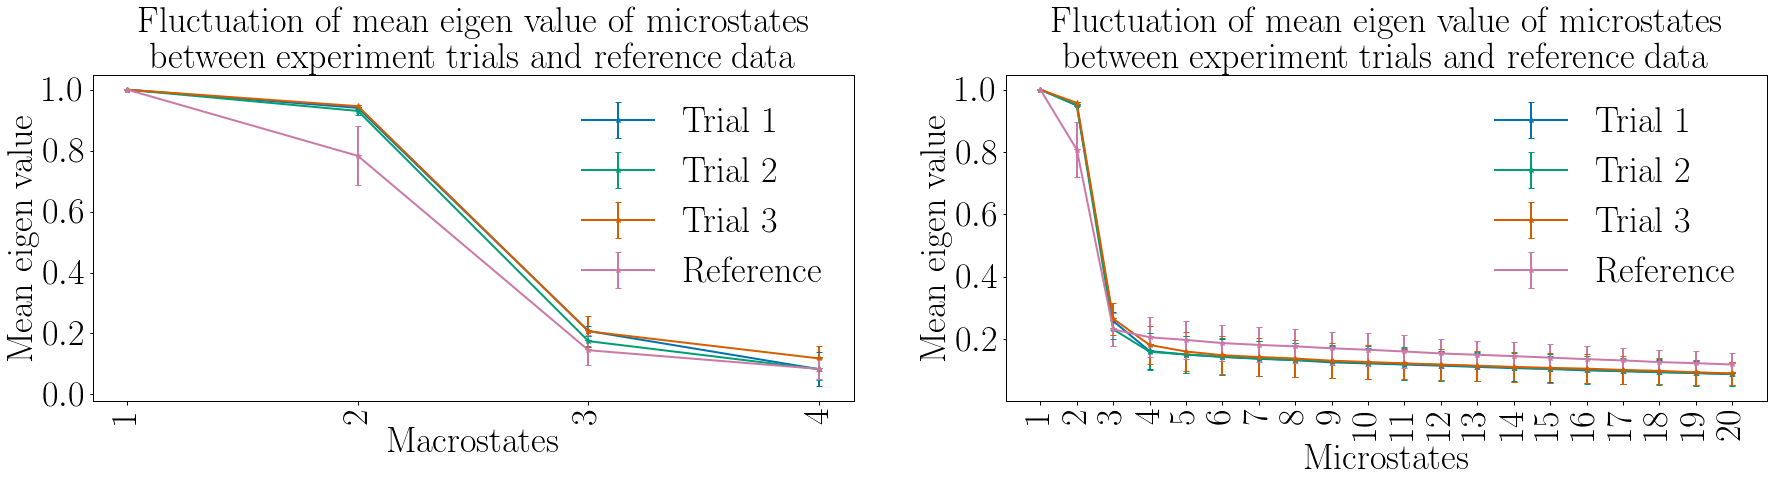

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((trials*10, 6))
SIZE = 36
macro_ax = macro_mean_df.plot(ax=ax[0],yerr= macro_std_df, kind='line', marker='*', fontsize=SIZE, rot=90, legend=True)
macro_ax.set_title('Fluctuation of mean eigen value of microstates\n between experiment trials and reference data', fontsize=SIZE)
macro_ax.set_xlabel('Macrostates', fontsize=SIZE)
macro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
macro_ax.set_xticks([x for x in range(1,5)])

macro_ax.legend(loc=1, prop={'size': 36})

micro_ax = micro_mean_df.plot(ax=ax[1],yerr= micro_std_df, kind='line', marker='*', fontsize=SIZE, rot=90, legend=True)
micro_ax.set_title('Fluctuation of mean eigen value of microstates\n between experiment trials and reference data', fontsize=SIZE)
micro_ax.set_xlabel('Microstates', fontsize=SIZE)
micro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
micro_ax.set_xticks([x for x in range(1,21)])

micro_ax.legend(loc=1, prop={'size': 36})

fig.savefig('../plots/mean_std_macro_micro_combined.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/mean_std_macro_micro_combined.png', dpi=100, bbox_inches='tight')

In [10]:
import numpy as np
from math import sqrt
N_trials = 3

macro_df = pd.DataFrame(columns=['Trial', 'Reference'])
for r in macro_mean_df.iterrows():
    trial = np.mean(r[1][:N_trials])
    macro_df.loc[r[0]] = [trial, r[1][N_trials]]

macro_err_df = pd.DataFrame(columns = ['Trial', 'Reference'])
for r in macro_std_df.iterrows():
    trial = 0.0
    for v in r[1][:N_trials]:
        trial += v*v
    trial = sqrt(trial)/(N_trials)
    macro_err_df.loc[r[0]] = [trial, r[1][N_trials]]

micro_df = pd.DataFrame(columns=['Trial', 'Reference'])
for r in micro_mean_df.iterrows():
    trial = np.mean(r[1][:N_trials])
    micro_df.loc[r[0]] = [trial, r[1][N_trials]]

micro_err_df = pd.DataFrame(columns = ['Trial', 'Reference'])
for r in micro_std_df.iterrows():
    trial = 0.0
    for v in r[1][:N_trials]:
        trial += v*v
    trial = sqrt(trial)/N_trials
    micro_err_df.loc[r[0]] = [trial, r[1][N_trials]]

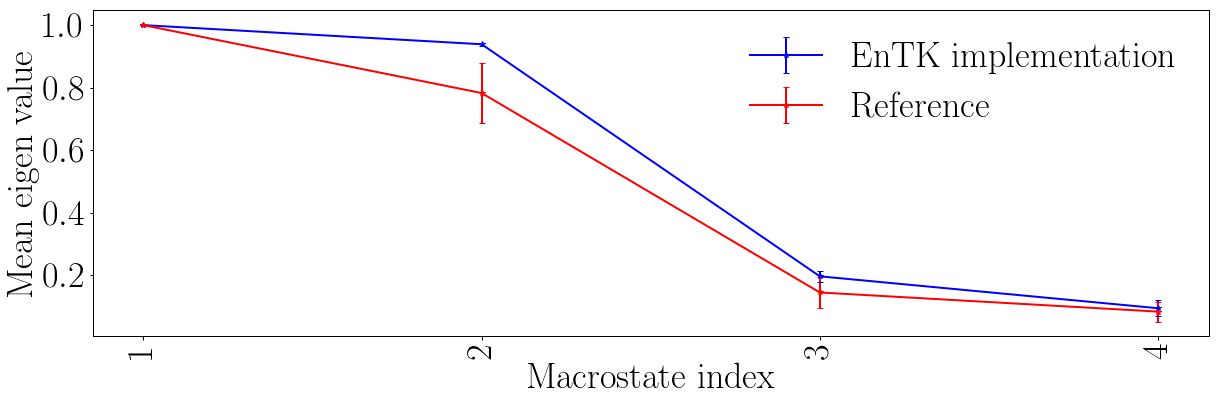

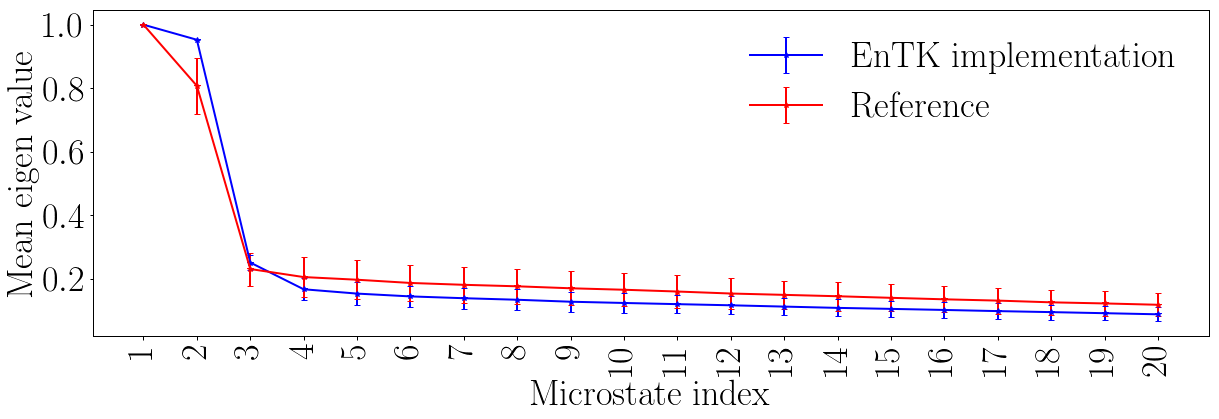

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((20, 6))
SIZE = 36

macro_ax = macro_df.plot(ax=ax,yerr= macro_err_df, kind='line', color=['blue','red'],marker='*', fontsize=SIZE, rot=90, legend=True)
# macro_ax.set_title('Fluctuation of mean eigen value of microstates\n between experiment trials and reference data', fontsize=SIZE)
macro_ax.set_xlabel('Macrostate index', fontsize=SIZE)
macro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
macro_ax.set_xticks([x for x in range(1,5)])
handles, labels = macro_ax.get_legend_handles_labels()
labels = ['EnTK implementation','Reference']
macro_ax.legend(handles, labels, loc=1, prop={'size': 36})

fig.savefig('../plots/mean_std_macro.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/mean_std_macro.png', dpi=100, bbox_inches='tight')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((20, 6))
SIZE = 36

micro_ax = micro_df.plot(ax=ax,yerr= micro_err_df, kind='line', color=['blue','red'],marker='*', fontsize=SIZE, rot=90, legend=True)
# micro_ax.set_title('Fluctuation of mean eigen value of microstates\n between experiment trials and reference data', fontsize=SIZE)
micro_ax.set_xlabel('Microstate index', fontsize=SIZE)
micro_ax.set_ylabel('Mean eigen value', fontsize=SIZE)
micro_ax.set_xticks([x for x in range(1,21)])
handles, labels = micro_ax.get_legend_handles_labels()
labels = ['EnTK implementation','Reference']
micro_ax.legend(handles, labels, loc=1, prop={'size': 36})


fig.savefig('../plots/mean_std_micro.pdf', dpi=100, bbox_inches='tight')
fig.savefig('../plots/mean_std_micro.png', dpi=100, bbox_inches='tight')